In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.theta import theta_cycle_participation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

In [3]:
save_path = (r"Z:\home\ryanh\projects\ripple_heterogeneity\theta_cycle_participation_v1")

batch_analysis.run(
    df,
    save_path,
    theta_cycle_participation.run,
    parallel=True,
    overwrite=False,
    verbose=True,
    skip_if_error=False,
)
# load results
results_df = theta_cycle_participation.load_results(save_path)

100%|██████████| 302/302 [43:32<00:00,  8.65s/it]


In [10]:
results_df

,partici_prob,firing_rate,UID,deepSuperficial,deepSuperficialDistance,basepath,constant
0,0.028965,0.205863,1,Deep,-178.457275,Z:\Data\AYAold\AB1\day1,1
1,0.006933,0.053588,2,Superficial,171.542725,Z:\Data\AYAold\AB1\day1,1
2,0.083661,0.855286,9,middle,-28.457275,Z:\Data\AYAold\AB1\day1,1
3,0.053001,0.495557,10,Superficial,121.542725,Z:\Data\AYAold\AB1\day1,1
4,0.399661,9.013403,12,middle,-28.457275,Z:\Data\AYAold\AB1\day1,1
...,...,...,...,...,...,...,...
8260,0.038356,0.470860,112,Deep,-178.470382,Z:\Data\ORproject\OR23\day5,1
8261,0.043653,0.470860,113,Deep,-88.470382,Z:\Data\ORproject\OR23\day5,1
8262,0.030989,0.348477,114,Deep,-78.470382,Z:\Data\ORproject\OR23\day5,1
8263,0.245601,2.276162,115,Superficial,44.599494,Z:\Data\ORproject\OR23\day5,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:1.928e-25 U_stat=4.034e+06


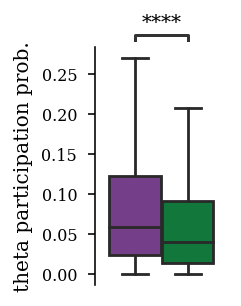

In [25]:
fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

results_df["constant"] = 1
sns.boxplot( 
    data=results_df,
    x="constant",
    y="partici_prob",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    showfliers=False
)

box_pairs = [
    ((1, "Deep"), (1, "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df,
    x="constant",
    y="partici_prob",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.ylabel('theta participation prob.')
plt.legend(frameon=False)
plt.gca().get_legend().remove()
plt.xlabel("")
plt.gca().axes.get_xaxis().set_visible(False)
sns.despine(bottom=True)
plt.savefig(os.path.join(fig_save_path,'theta_cycle_participation.svg'),dpi=300,bbox_inches='tight')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Deep vs. 1_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:4.024e-41 U_stat=4.203e+06


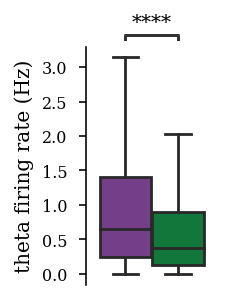

In [26]:
fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

results_df["constant"] = 1
sns.boxplot( 
    data=results_df,
    x="constant",
    y="firing_rate",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    showfliers=False
)

box_pairs = [
    ((1, "Deep"), (1, "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=results_df,
    x="constant",
    y="firing_rate",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
plt.ylabel('theta firing rate (Hz)')

plt.legend(frameon=False)
plt.gca().get_legend().remove()
plt.xlabel("")
plt.gca().axes.get_xaxis().set_visible(False)
sns.despine(bottom=True)

plt.savefig(os.path.join(fig_save_path,'theta_cycle_firing_rate.svg'),dpi=300,bbox_inches='tight')
